[0.   0.   0.   0.25 0.25 0.5  0.5  1.  ]
[1.95 0.95 0.85 0.8  0.55 0.45 0.3  0.1 ]


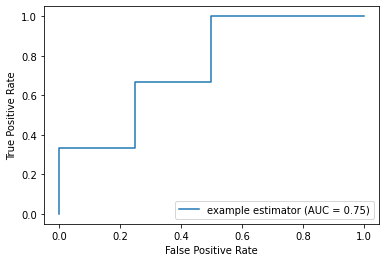

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
y = np.array([0, 0, 1, 1, 0, 1 ,1, 0, 1, 1])
pred = np.array([0.1, 0.2, 0.3, 0.4, 0.45, 0.55, 0.7, 0.8, 0.85, 0.95])
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
print(fpr)
print(thresholds)
plt.show()

2.1

[]

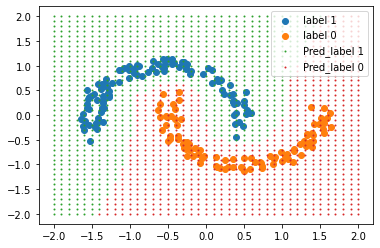

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

dataset = pd.read_csv('D2z.txt', header=None, delimiter=' ').to_numpy()

X = dataset[:, 0:-1]
Y = dataset[:, -1]
Y_pred = []

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)

grid = np.linspace(-2,2,41)
for i in grid:
  for j in grid:
      Y_pred.append([i, j, *neigh.predict([[i,j]])])
      
Y_pred = np.array(Y_pred)

Y_label_1 = dataset[dataset[:,-1]==1]
Y_label_0 = dataset[dataset[:,-1]==0]
Y_pred_label_1 = Y_pred[Y_pred[:,-1]==1]
Y_pred_label_0 = Y_pred[Y_pred[:,-1]==0]

fig, ax = plt.subplots()
ax.scatter(Y_label_1[:,0], Y_label_1[:,1], label='label 1')
ax.scatter(Y_label_0[:,0], Y_label_0[:,1], label='label 0')
ax.scatter(Y_pred_label_1[:,0], Y_pred_label_1[:,1], label='Pred_label 1',s=1)
ax.scatter(Y_pred_label_0[:,0], Y_pred_label_0[:,1], label='Pred_label 0',s=1)

ax.legend()
plt.plot()

2.2

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pdb

dataset = pd.read_csv('emails.csv', header=None, delimiter=',', skiprows=1).iloc[:,1:].to_numpy()
kf = KFold(n_splits=5)
kf.get_n_splits(X)
data_index = np.arange(5000, dtype=int)
# kf_test = []
kf_test_index = np.array_split(data_index, 5)
avg = []
X = dataset[:, 0:-1]
y = dataset[:, -1]
for test_index in kf_test_index:
    print()
    train_index = np.setdiff1d(data_index, test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    print("Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))
    print("Precision: {:.3f}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall: {:.3f}".format(metrics.recall_score(y_test, y_pred)))
    # avg.append(1 - metrics.accuracy_score(y_test, y_pred))

# print("avg", sum(avg)/len(avg))


Accuracy: 0.825
Precision: 0.654
Recall: 0.818

Accuracy: 0.853
Precision: 0.686
Recall: 0.866

Accuracy: 0.862
Precision: 0.721
Recall: 0.838

Accuracy: 0.851
Precision: 0.716
Recall: 0.816

Accuracy: 0.775
Precision: 0.606
Recall: 0.758


2.3

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pdb

dataset = pd.read_csv('emails.csv', header=None, delimiter=',', skiprows=1).iloc[:,1:].to_numpy()
kf = KFold(n_splits=5)
kf.get_n_splits(X)
data_index = np.arange(5000, dtype=int)
# kf_test = []
kf_test_index = np.array_split(data_index, 5)
k_avg = []
X = dataset[:, 0:-1]
y = dataset[:, -1]
ks = [1,3,5,7,10]
for k in ks:
  avg = []
  for test_index in kf_test_index:
      print()
      train_index = np.setdiff1d(data_index, test_index)
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      neigh = KNeighborsClassifier(n_neighbors=k)
      neigh.fit(X_train, y_train)
      y_pred = neigh.predict(X_test)
      print("Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))
      avg.append(metrics.accuracy_score(y_test, y_pred))
  print("avg Acc: {:.3f}".format(sum(avg)/len(avg)))
  k_avg.append(sum(avg)/len(avg))


Accuracy: 0.825

Accuracy: 0.853

Accuracy: 0.862

Accuracy: 0.851

Accuracy: 0.775
avg Acc: 0.833

Accuracy: 0.847

Accuracy: 0.851

Accuracy: 0.859

Accuracy: 0.880

Accuracy: 0.774
avg Acc: 0.842

Accuracy: 0.837

Accuracy: 0.850

Accuracy: 0.869

Accuracy: 0.869

Accuracy: 0.779
avg Acc: 0.841

Accuracy: 0.839

Accuracy: 0.864

Accuracy: 0.875

Accuracy: 0.874

Accuracy: 0.779
avg Acc: 0.846

Accuracy: 0.862

Accuracy: 0.869

Accuracy: 0.878

Accuracy: 0.887

Accuracy: 0.782
avg Acc: 0.856


2.4

[0.8332, 0.8422000000000001, 0.8408, 0.8462, 0.8556000000000001]


Text(0, 0.5, 'Average accuracy')

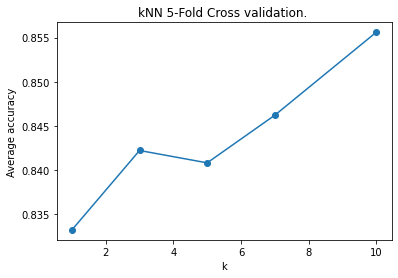

In [160]:
print(k_avg)
plt.plot(ks, k_avg, marker='o')
plt.title('kNN 5-Fold Cross validation. ')
plt.xlabel('k')
plt.ylabel('Average accuracy')

In [153]:
import numpy as np


class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x
            linear_model = np.dot(X, self.weights)
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw

    def predict(self, X):
        linear_model = np.dot(X, self.weights)
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


2.3

In [73]:
data_index = np.arange(5000, dtype=int)
# kf_test = []
kf_test_index = np.array_split(data_index, 5)
avg = []
X = dataset[:, 0:-1]
y = dataset[:, -1]
for test_index in kf_test_index:
    print()
    train_index = np.setdiff1d(data_index, test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print("Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))
    print("Precision: {:.3f}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall: {:.3f}".format(metrics.recall_score(y_test, y_pred)))
    # avg.append(1 - metrics.accuracy_score(y_test, y_pred))

# print("avg", sum(avg)/len(avg))


Accuracy: 0.877
Precision: 0.846
Recall: 0.695

Accuracy: 0.867
Precision: 0.833
Recall: 0.650

Accuracy: 0.861
Precision: 0.876
Recall: 0.595

Accuracy: 0.849
Precision: 0.821
Recall: 0.622

Accuracy: 0.775
Precision: 0.669
Recall: 0.523


In [79]:
test_index = data_index[0:1000]
train_index = np.setdiff1d(data_index, test_index)
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred_knn = neigh.predict(X_test)
print("Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred_knn)))

Accuracy: 0.837


In [164]:
regressor = LogisticRegression(learning_rate=0.0001, n_iters=10000)
regressor.fit(X_train, y_train)
y_pred_LR = regressor.predict(X_test)
print("Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred_LR)))

KeyboardInterrupt: ignored

2.5

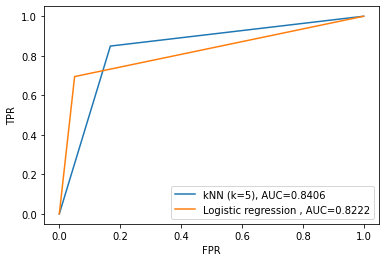

In [159]:
#fit logistic regression model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_knn)
auc = round(metrics.roc_auc_score(y_test, y_pred_knn), 4)
plt.plot(fpr,tpr,label="kNN (k=5), AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_LR)
auc = round(metrics.roc_auc_score(y_test, y_pred_LR), 4)
plt.plot(fpr,tpr,label="Logistic regression , AUC="+str(auc))


plt.xlabel('FPR')
plt.ylabel('TPR')

#add legend
plt.legend()

In [182]:
#import required modules
import numpy as np
 
class LogisticRegression:
    def __init__(self,x,y):      
        self.intercept = np.ones((x.shape[0], 1))  
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y
         
    #Sigmoid method
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))
     
    #method to calculate the Loss
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
     
    #Method for calculating the gradients
    def gradient_descent(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]
 
     
    def fit(self, lr , iterations):
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
             
            loss = self.loss(sigma,self.y)
 
            dW = self.gradient_descent(self.x , sigma, self.y)
             
            #Updating the weights
            self.weight -= lr * dW
 
        return print('fitted successfully to data')
     
    #Method to predict the class label.
    def predict(self, x_new , treshold):
        self.intercept = np.ones((x_new.shape[0], 1)) 
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        result = self.sigmoid(x_new, self.weight)
        result = result >= treshold
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] == True: 
                y_pred[i] = 1
            else:
                continue
                 
        return y_pred

In [183]:
test_index = data_index[0:1000]
train_index = np.setdiff1d(data_index, test_index)
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [ ]:
data_index = np.arange(5000, dtype=int)
# kf_test = []
kf_test_index = np.array_split(data_index, 5)
avg = []
X = dataset[:, 0:-1]
y = dataset[:, -1]
kf1_y_pred = []
i=0
for test_index in kf_test_index:
    print()
    train_index = np.setdiff1d(data_index, test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regressor = LogisticRegression(X_train,y_train)
    regressor.fit(0.0001 , 1000000)
    y_pred = regressor.predict(X_test,0.5)
    print("Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))
    print("Precision: {:.3f}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall: {:.3f}".format(metrics.recall_score(y_test, y_pred)))
    # avg.append(1 - metrics.accuracy_score(y_test, y_pred))
    if i == 0:
      kf1_y_pred = y_pred
    i+=1
# print("avg", sum(avg)/len(avg))

<ipython-input-182-575e5f5caa34>:18: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
<ipython-input-182-575e5f5caa34>:18: RuntimeWarning: invalid value encountered in multiply
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


In [178]:
#Preparing the data

 
#creating the class Object
regressor = LogisticRegression(X_train,y_train)
 
#
regressor.fit(0.0001 , 100000)
 
 
y_pred_LR = regressor.predict(X_test,0.5)
 
print('accuracy -> {}'.format(sum(y_pred == y_test) / y_test.shape[0]))

<ipython-input-169-575e5f5caa34>:18: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
<ipython-input-169-575e5f5caa34>:18: RuntimeWarning: invalid value encountered in multiply
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


fitted successfully to data
accuracy -> 0.92


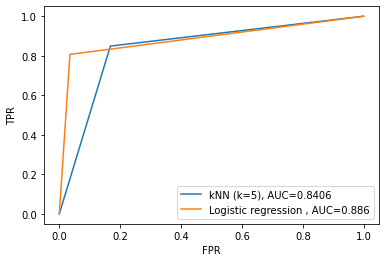

In [179]:
#fit logistic regression model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_knn)
auc = round(metrics.roc_auc_score(y_test, y_pred_knn), 4)
plt.plot(fpr,tpr,label="kNN (k=5), AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_LR)
auc = round(metrics.roc_auc_score(y_test, y_pred_LR), 4)
plt.plot(fpr,tpr,label="Logistic regression , AUC="+str(auc))


plt.xlabel('FPR')
plt.ylabel('TPR')

#add legend
plt.legend()